# SUPPORT VECTOR MACHINE USING TRIVIAL DATASET

In [14]:
from sklearn.cross_validation import KFold
from sklearn.svm import LinearSVC
from sklearn.cross_validation import cross_val_score
import numpy as np
import scipy.io as sio
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import cross_validation 
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
import pylab as pl
import pandas as pd
from csv import reader
import csv
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from numpy import random
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, svm
from numpy import where
from mlxtend.plotting import plot_decision_regions



To check the performance measure on a trivial dataset.

X is generated randomly. It is a 200x2 matrix. Two columns represent X1 and X2 (2 attributes). Y is either 0 or 1.

After loading the dataset, the dataset is split into train split and test split.

In [15]:
rng = np.random.RandomState(0)
X = rng.randn(200, 2) 
Y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), dtype=int) 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)  


# Linear Kernel : 

We use existing SVM library and define the kernel as 'Linear'. Using the GridSearchCV API function, 5 fold cross-validation is performed for each different value of 'C'. The corresponding best parameters are noted.

In [16]:
kr1 = GridSearchCV(svm.SVC(kernel='linear'), cv=5,
                  param_grid={"C": [1e0, 0.1, 1e-2, 1e-3, 0.5, 2,3,5]})
kr1.fit(X_train, y_train)
y_kr1 = kr1.predict(X_test)

print("THis is Linear Kernel")
print('Best score for data:', kr1.best_score_) 
print('Best alpha:',kr1.best_estimator_.C) 
print('Best Kernel:',kr1.best_estimator_.kernel)
print("RMean squared error: %.2f" % np.sqrt(np.mean((y_kr1 - y_test) ** 2)))



THis is Linear Kernel
('Best score for data:', 0.67000000000000004)
('Best alpha:', 2)
('Best Kernel:', 'linear')
RMean squared error: 0.58


# Polynomial Kernel :

We use existing SVM library and define the kernel as 'Poly'. Using the GridSearchCV API function, 5 fold cross-validation is performed for each different value of 'lambda', 'gamma', 'R' and 'degree'. The corresponding best parameters are noted.

In [17]:
kr2 = GridSearchCV(svm.SVC(kernel='poly'), cv=5,
                  param_grid={"C": [1e0, 0.1, 1e-2, 1e-3, 0.5, 2,3,5],
                              "gamma": [0.001,0.0001,0.01,0.1,1,0.5,2,3],
                              "degree":[1,2,3],
                              "coef0":[1,2,3]})
kr2.fit(X_train, y_train)
y_kr2 = kr2.predict(X_test)
print("This is Polynomial Kernel")
print('Best score for data:', kr2.best_score_) 
print('Best alpha:',kr2.best_estimator_.C) 
print('Best Kernel:',kr2.best_estimator_.kernel)
print('Best Gamma:',kr2.best_estimator_.gamma)
print('Best degree:',kr2.best_estimator_.degree)
print('Best coefficient:',kr2.best_estimator_.coef0)
print("RMean squared error: %.2f" % np.sqrt(np.mean((y_kr2 - y_test) ** 2)))


This is Polynomial Kernel
('Best score for data:', 0.96999999999999997)
('Best alpha:', 5)
('Best Kernel:', 'poly')
('Best Gamma:', 2)
('Best degree:', 2)
('Best coefficient:', 1)
RMean squared error: 0.14


# Gaussian Kernel

We use existing SVM library and define the kernel as 'rbf'. Using the GridSearchCV API function, 5 fold cross-validation is performed for each different value of 'lambda' and 'gamma'. The corresponding best parameters are noted.

In [18]:
kr3 = GridSearchCV(svm.SVC(kernel='rbf'), cv=5,
                  param_grid={"C": [1e0, 0.1, 1e-2, 1e-3, 0.5, 2,3,5],
                              "gamma": [0.001,0.0001,0.01,0.1,1,0.5,2,3]})
kr3.fit(X_train, y_train)
y_kr3 = kr3.predict(X_test)
print("THis is Gaussian Kernel")
print('Best score for data:', kr3.best_score_) 
print('Best alpha:',kr3.best_estimator_.C) 
print('Best Kernel:',kr3.best_estimator_.kernel)
print('Best Gamma:',kr3.best_estimator_.gamma)
print("RMean squared error: %.2f" % np.sqrt(np.mean((y_kr3 - y_test) ** 2)))


THis is Gaussian Kernel
('Best score for data:', 0.92000000000000004)
('Best alpha:', 2)
('Best Kernel:', 'rbf')
('Best Gamma:', 3)
RMean squared error: 0.17


#  Graphical Representation

Linear Kernel implementation is done on the trivial data and results are visualized graphically. The performance of the same is recorded- The RMSE is 0.58 and the accuracy is 0.67.

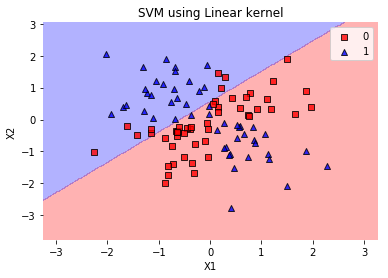

In [19]:
plot_decision_regions(X_test,y_test, clf=kr1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM using Linear kernel')
plt.legend()
plt.show()

Polynomial Kernel implementation is done on the trivial data and results are visualized graphically. The performance of the same is recorded- The RMSE is 0.14 and the accuracy is 0.969.

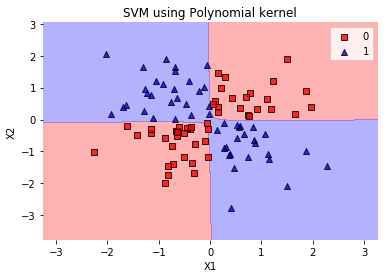

In [20]:
plt.xlabel('X1')
plt.ylabel('X2')
plot_decision_regions(X_test,y_test, clf=kr2)
plt.title('SVM using Polynomial kernel')
plt.legend()
plt.show()

Gaussian Kernel implementation is done on the trivial data and results are visualized graphically. The performance of the same is recorded- The RMSE is 0.17 and the accuracy is 0.92.

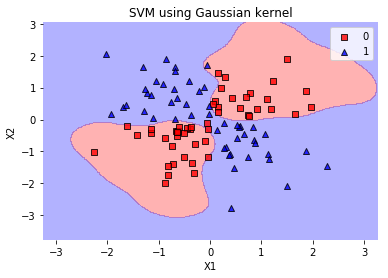

In [21]:
plt.xlabel('X1')
plt.ylabel('X2')
plot_decision_regions(X_test,y_test, clf=kr3)
plt.title('SVM using Gaussian kernel')
plt.legend()
plt.show()

Best kernel for the Trivial Dataset

In [24]:
print("Best kernel for the trivial dataset is Polynomial kernel")
print("The following are its best hyperparameter values")
print('Best score for data:', kr2.best_score_) 
print('Best alpha:',kr2.best_estimator_.C) 
print('Best Kernel:',kr2.best_estimator_.kernel)
print('Best Gamma:',kr2.best_estimator_.gamma)
print('Best degree:',kr2.best_estimator_.degree)
print('Best coefficient:',kr2.best_estimator_.coef0)
print("RMean squared error: %.2f" % np.sqrt(np.mean((y_kr2 - y_test) ** 2)))


Best kernel for the trivial dataset is Polynomial kernel
The following are its best hyperparameter values
('Best score for data:', 0.96999999999999997)
('Best alpha:', 5)
('Best Kernel:', 'poly')
('Best Gamma:', 2)
('Best degree:', 2)
('Best coefficient:', 1)
RMean squared error: 0.14
